## Abstract
We analysed various factors that contributes to GDP of any country. For reading and analyzing these factors we used bar graphs, box plots, comparision tables, distribution plots, heatmaps and pair plots. We found out that the major factors related to the GDP were literacy, IMR, deathrate, net migration, birth rate, phone, services and agriculture. While literacy. phones and services were directly proportional to the GDP, other attributes are inversely proportional to it. 

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [5]:
df=pd.read_csv("data\countries of the world.csv", decimal=',')

In [6]:
df.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34        0.380     0.240    0.380  
1      15.11       5.22        0.232     0.188    0.579  
2      17.14       4.61        0.101     0.600    0.298  
3      22.46       3.27          NaN       NaN      NaN  
4       8.71       6.25          NaN       NaN      NaN

panda reads the value from csv file of data,(where the path is provided to reach the location of data file). 'df.head' command provides first five values to read and analyze.  

In [7]:
df.describe()

Population  Area (sq. mi.)  Pop. Density (per sq. mi.)  \
count  2.270000e+02    2.270000e+02                  227.000000   
mean   2.874028e+07    5.982270e+05                  379.047137   
std    1.178913e+08    1.790282e+06                 1660.185825   
min    7.026000e+03    2.000000e+00                    0.000000   
25%    4.376240e+05    4.647500e+03                   29.150000   
50%    4.786994e+06    8.660000e+04                   78.800000   
75%    1.749777e+07    4.418110e+05                  190.150000   
max    1.313974e+09    1.707520e+07                16271.500000   

       Coastline (coast/area ratio)  Net migration  \
count                    227.000000     224.000000   
mean                      21.165330       0.038125   
std                       72.286863       4.889269   
min                        0.000000     -20.990000   
25%                        0.100000      -0.927500   
50%                        0.730000       0.000000   
75%                       10.345000       0.997500   
max                      870.660000      23.060000   

       Infant mortality (per 1000 births)  GDP ($ per capita)  Literacy (%)  \
count                          224.000000          226.000000    209.000000   
mean                            35.506964         9689.823009     82.838278   
std                             35.389899        10049.138513     19.722173   
min                              2.290000          500.000000     17.600000   
25%                              8.150000         1900.000000     70.600000   
50%                             21.000000         5550.000000     92.500000   
75%                             55.705000        15700.000000     98.000000   
max                            191.190000        55100.000000    100.000000   

       Phones (per 1000)  Arable (%)   Crops (%)   Other (%)     Climate  \
count         223.000000  225.000000  225.000000  225.000000  205.000000   
mean          236.061435   13.797111    4.564222   81.638311    2.139024   
std           227.991829   13.040402    8.361470   16.140835    0.699397   
min             0.200000    0.000000    0.000000   33.330000    1.000000   
25%            37.800000    3.220000    0.190000   71.650000    2.000000   
50%           176.200000   10.420000    1.030000   85.700000    2.000000   
75%           389.650000   20.000000    4.440000   95.440000    3.000000   
max          1035.600000   62.110000   50.680000  100.000000    4.000000   

        Birthrate   Deathrate  Agriculture    Industry     Service  
count  224.000000  223.000000   212.000000  211.000000  212.000000  
mean    22.114732    9.241345     0.150844    0.282711    0.565283  
std     11.176716    4.990026     0.146798    0.138272    0.165841  
min      7.290000    2.290000     0.000000    0.020000    0.062000  
25%     12.672500    5.910000     0.037750    0.193000    0.429250  
50%     18.790000    7.840000     0.099000    0.272000    0.571000  
75%     29.820000   10.605000     0.221000    0.341000    0.678500  
max     50.730000   29.740000     0.769000    0.906000    0.954000

'DataFrame.describe' generate ststistics of numeric as well as object data. In numeric data we get count, mean, std, minimum and maximum, lower, upper and 50 percentile of above 5 countries.

In [8]:
top_gdp_countries = df.sort_values('GDP ($ per capita)',ascending=False)
# Look at top 20
top_gdp_countries[['GDP ($ per capita)','Country']].head(20)

GDP ($ per capita)          Country
121             55100.0      Luxembourg 
154             37800.0          Norway 
214             37800.0   United States 
22              36000.0         Bermuda 
38              35000.0  Cayman Islands 
177             34600.0      San Marino 
196             32700.0     Switzerland 
54              31100.0         Denmark 
93              30900.0         Iceland 
12              30000.0         Austria 
36              29800.0          Canada 
98              29600.0         Ireland 
19              29100.0         Belgium 
11              29000.0       Australia 
91              28800.0       Hong Kong 
146             28600.0     Netherlands 
103             28200.0           Japan 
10              28000.0           Aruba 
213             27700.0  United Kingdom 
76              27600.0         Germany

From the table of 228 countries, we sorted the values for top 20 countries having maximum gdp per capita in descending manner(by making boolean false for ascending).

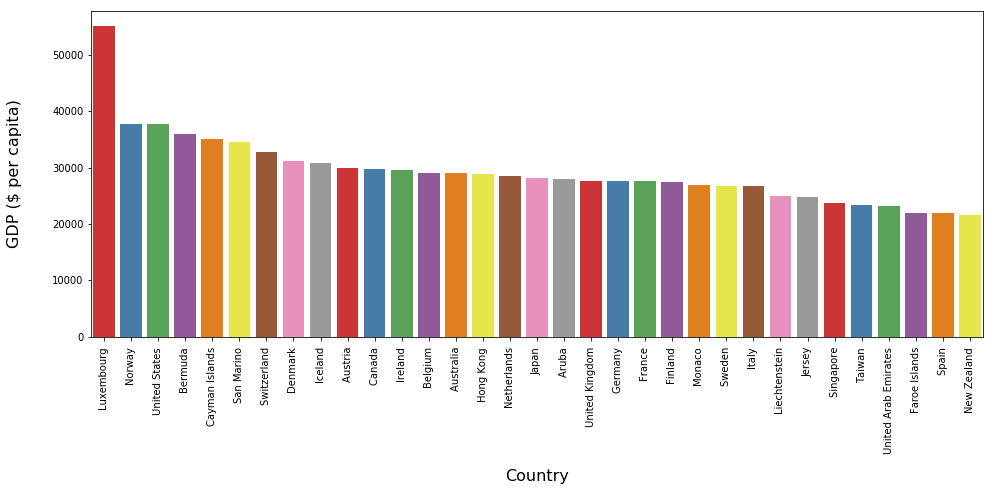

In [9]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.head(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

 for the better analysis of countries having top gdp, we have plotted bar graph. X axis(size-16) contains name of 33 countries having highest GDP and Y axis(size-6) contains GDP per capita.In analysis,we found that Luxembourg has the highest GDP.

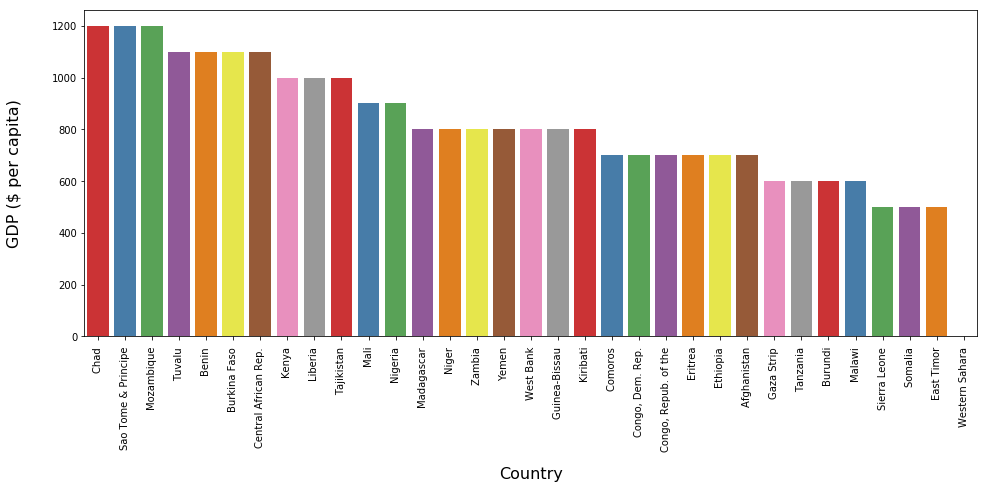

In [10]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=top_gdp_countries.tail(33), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

Similar to the earlier bar graph, this bar graph depicts the countries having minimum GDPs.Here we have taken bottom 33 countries, where x-axis presents country name and y-axis shows GDP per capita. In this analysis we found that Western Sahara has zero GDP. 

In [11]:
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing', 'percent'])

total_missing  percent
Climate                                        22     9.69
Literacy (%)                                   18     7.93
Industry                                       16     7.05
Service                                        15     6.61
Agriculture                                    15     6.61
Deathrate                                       4     1.76
Phones (per 1000)                               4     1.76
Birthrate                                       3     1.32
Infant mortality (per 1000 births)              3     1.32
Net migration                                   3     1.32
Other (%)                                       2     0.88
Crops (%)                                       2     0.88
Arable (%)                                      2     0.88
GDP ($ per capita)                              1     0.44

'df.isnull().sum()' sorts sum of all the values in a particular part having null values. for example, in climate part, there are 22 times null values. And these values are arranged in descending manner by making boolean ascending false.
After calculating percentage of these null values, we have arranged total_missing(total null values) and percentage in a table in descending manner.

In [12]:
df.isnull().values.any()

True

To check whether there are any null value in the data 'isnull().values.any()' command is used. It gives boolean value as true as there are several null values.

In [13]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

To fnd out the list of null values in different parts 'isnull().sum()' command is used, where it gives all null values if any has zero as well.

In [14]:
df.isnull().sum().sum()

110

To calculate the sum of all the null values 'isnull().sum().sum()' is used.

In [15]:
df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

GDP ($ per capita)  Literacy (%)  \
Region                                                                  
ASIA (EX. NEAR EAST)                             3450.0         90.60   
BALTICS                                         11400.0         99.80   
C.W. OF IND. STATES                              3450.0         99.05   
EASTERN EUROPE                                   9100.0         98.60   
LATIN AMER. & CARIB                              6300.0         94.05   
NEAR EAST                                        9250.0         83.00   
NORTHERN AFRICA                                  6000.0         70.00   
NORTHERN AMERICA                                29800.0         97.50   
OCEANIA                                          5000.0         95.00   
SUB-SAHARAN AFRICA                               1300.0         62.95   
WESTERN EUROPE                                  27200.0         99.00   

                                     Agriculture  
Region                                            
ASIA (EX. NEAR EAST)                      0.1610  
BALTICS                                   0.0400  
C.W. OF IND. STATES                       0.1980  
EASTERN EUROPE                            0.0815  
LATIN AMER. & CARIB                       0.0700  
NEAR EAST                                 0.0350  
NORTHERN AFRICA                           0.1320  
NORTHERN AMERICA                          0.0100  
OCEANIA                                   0.1505  
SUB-SAHARAN AFRICA                        0.2760  
WESTERN EUROPE                            0.0220

Here we make groups of countries such as Asia, Western europe etc. and calculated the median of total GDP, literacy and agriculture in respective region.

In [16]:
for col in df.columns.values:
    if df[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = df.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = df.groupby('Region')[col].median()
    for region in df['Region'].unique():
        df[col].loc[(df[col].isnull())&(df['Region']==region)] = guess_values[region]

C:\Users\kavit\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [17]:
print(df.isnull().sum())

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         0
Infant mortality (per 1000 births)    0
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     0
Arable (%)                            0
Crops (%)                             0
Other (%)                             0
Climate                               0
Birthrate                             0
Deathrate                             0
Agriculture                           0
Industry                              0
Service                               0
dtype: int64


Here we have replaced all the null values with median values. 

In [18]:
np.random.seed(sum(map(ord, "distributions")))

In [19]:
df.head()

Country                               Region  Population  \
0     Afghanistan         ASIA (EX. NEAR EAST)             31056997   
1         Albania   EASTERN EUROPE                          3581655   
2         Algeria   NORTHERN AFRICA                        32930091   
3  American Samoa   OCEANIA                                   57794   
4         Andorra   WESTERN EUROPE                            71201   

   Area (sq. mi.)  Pop. Density (per sq. mi.)  Coastline (coast/area ratio)  \
0          647500                        48.0                          0.00   
1           28748                       124.6                          1.26   
2         2381740                        13.8                          0.04   
3             199                       290.4                         58.29   
4             468                       152.1                          0.00   

   Net migration  Infant mortality (per 1000 births)  GDP ($ per capita)  \
0          23.06                              163.07               700.0   
1          -4.93                               21.52              4500.0   
2          -0.39                               31.00              6000.0   
3         -20.71                                9.27              8000.0   
4           6.60                                4.05             19000.0   

   Literacy (%)  Phones (per 1000)  Arable (%)  Crops (%)  Other (%)  Climate  \
0          36.0                3.2       12.13       0.22      87.65      1.0   
1          86.5               71.2       21.09       4.42      74.49      3.0   
2          70.0               78.1        3.22       0.25      96.53      1.0   
3          97.0              259.5       10.00      15.00      75.00      2.0   
4         100.0              497.2        2.22       0.00      97.78      3.0   

   Birthrate  Deathrate  Agriculture  Industry  Service  
0      46.60      20.34       0.3800     0.240    0.380  
1      15.11       5.22       0.2320     0.188    0.579  
2      17.14       4.61       0.1010     0.600    0.298  
3      22.46       3.27       0.1505     0.171    0.644  
4       8.71       6.25       0.0220     0.245    0.720

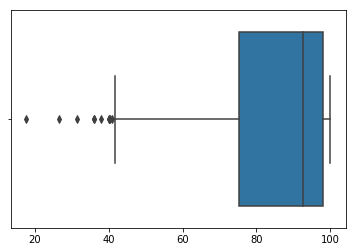

In [20]:
sns.boxplot(np.array(df['Literacy (%)']))

From the above table graph, seaborn library created ststistics on literacy in box form. Here, minimum value is 40, maximum value =100, first quartile =75, third quartile =98, inter quartile range =23, median= nearly 93.
After analysing box plot, we can say that the distribution of data is not symmetrical. It is more distributed towards maximium value and located between 75 and 98. It means, most of the countries have very good literacy rate with median value of 93

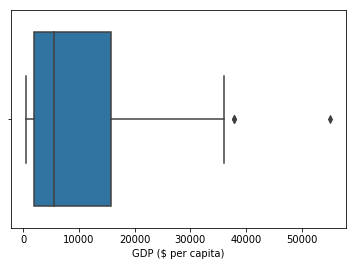

In [21]:
sns.boxplot(df['GDP ($ per capita)'])

Seaborn library created statistical data in box plot for GDP per capita with minimum value as 0 and maximum as $35000 with median value $5000. It shows that 50% of the coujtries have GDP is between 2000 and 15000,which is not so good. Only 25% countries have GDP between $15000 and $35000.

In [22]:
df.corr()

Population  Area (sq. mi.)  \
Population                            1.000000        0.469985   
Area (sq. mi.)                        0.469985        1.000000   
Pop. Density (per sq. mi.)           -0.028190       -0.066917   
Coastline (coast/area ratio)         -0.068199       -0.095627   
Net migration                         0.000122        0.047537   
Infant mortality (per 1000 births)    0.024488       -0.005120   
GDP ($ per capita)                   -0.038915        0.072460   
Literacy (%)                         -0.051610        0.025954   
Phones (per 1000)                    -0.029235        0.055026   
Arable (%)                            0.188337       -0.079270   
Crops (%)                            -0.059617       -0.142234   
Other (%)                            -0.121118        0.137956   
Climate                              -0.024329        0.031986   
Birthrate                            -0.044151       -0.064822   
Deathrate                            -0.025974        0.042418   
Agriculture                           0.004867       -0.048821   
Industry                              0.105732        0.127401   
Service                              -0.087356       -0.057227   

                                    Pop. Density (per sq. mi.)  \
Population                                           -0.028190   
Area (sq. mi.)                                       -0.066917   
Pop. Density (per sq. mi.)                            1.000000   
Coastline (coast/area ratio)                          0.241690   
Net migration                                         0.178088   
Infant mortality (per 1000 births)                   -0.142741   
GDP ($ per capita)                                    0.196063   
Literacy (%)                                          0.098487   
Phones (per 1000)                                     0.280818   
Arable (%)                                           -0.080857   
Crops (%)                                            -0.032460   
Other (%)                                             0.082066   
Climate                                               0.061828   
Birthrate                                            -0.157909   
Deathrate                                            -0.067910   
Agriculture                                          -0.110235   
Industry                                             -0.116734   
Service                                               0.229223   

                                    Coastline (coast/area ratio)  \
Population                                             -0.068199   
Area (sq. mi.)                                         -0.095627   
Pop. Density (per sq. mi.)                              0.241690   
Coastline (coast/area ratio)                            1.000000   
Net migration                                          -0.133947   
Infant mortality (per 1000 births)                     -0.138223   
GDP ($ per capita)                                      0.049561   
Literacy (%)                                            0.133112   
Phones (per 1000)                                       0.153204   
Arable (%)                                             -0.120760   
Crops (%)                                               0.338889   
Other (%)                                              -0.078312   
Climate                                                -0.006490   
Birthrate                                              -0.074021   
Deathrate                                              -0.162705   
Agriculture                                            -0.036301   
Industry                                               -0.214819   
Service                                                 0.210201   

                                    Net migration  \
Population                               0.000122   
Area (sq. mi.)                           0.047537   
Pop. Density (per sq. mi.)               0.178088   
Coastline (coast/area

There is visible correlation between GDP of various countries and othe factors such as population, services etc or we can say this all are the factors that affect GDP of any country. 
When population raises, it impacts GDP negatively. It means government of any country can better to small population in all ways that includes good education, better food any other services. Similarly, country with good GDP has lesser infant mortality due to sufficient health services.

There are some of the factors that directly affects GDP or GDP affects them. It include climate change, services, phones, literacy and net migration, these are directly proportional to GDP, that raises positively with the increase of GDP. However, birthrate, agriculture, crops and inant mortality are inversely proportional to the GDP. 

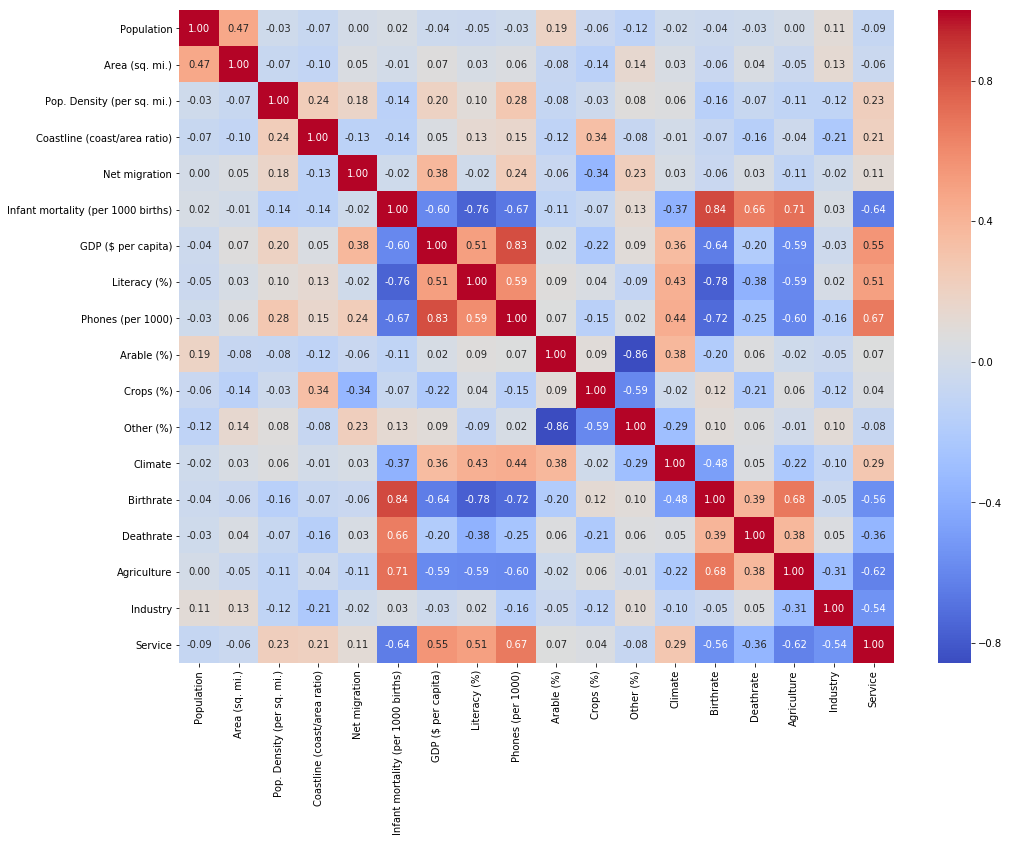

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

 Seaborn library created heatmap(colorful two dimensional presentation of data), where we can read and analyze data on hte scale of 0.8 to -0.8 with different shades of color. Factors that are inversely proportional to GDP are presented in blue shades, however, factors that affects directly are in red color shades. While understanding the command for this presentation, 'annot' responsible for mathematical values on colored boxes.'fmt' is for vlaue till 2 digits after decimal.

From this graph we can understand that GDP is highly affecting the mobile phone users as well as literacy and people employed in service sector.Also we can infer that as GDP increases IMR, and birthrate sharply declines.This might be due to the primary focus of government on health care sector.

In [24]:
x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate']]

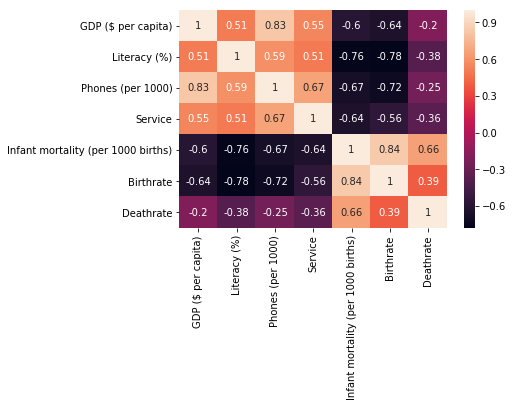

In [25]:
sns.heatmap(x.corr(), annot=True)

Alike to the earlier heatmap, here data is more concised. Here only those attributes are included that are more affected or related to each other and mainly to GDP. TO read and analyze the data a scale of 0.9 to -0.6 is given. 

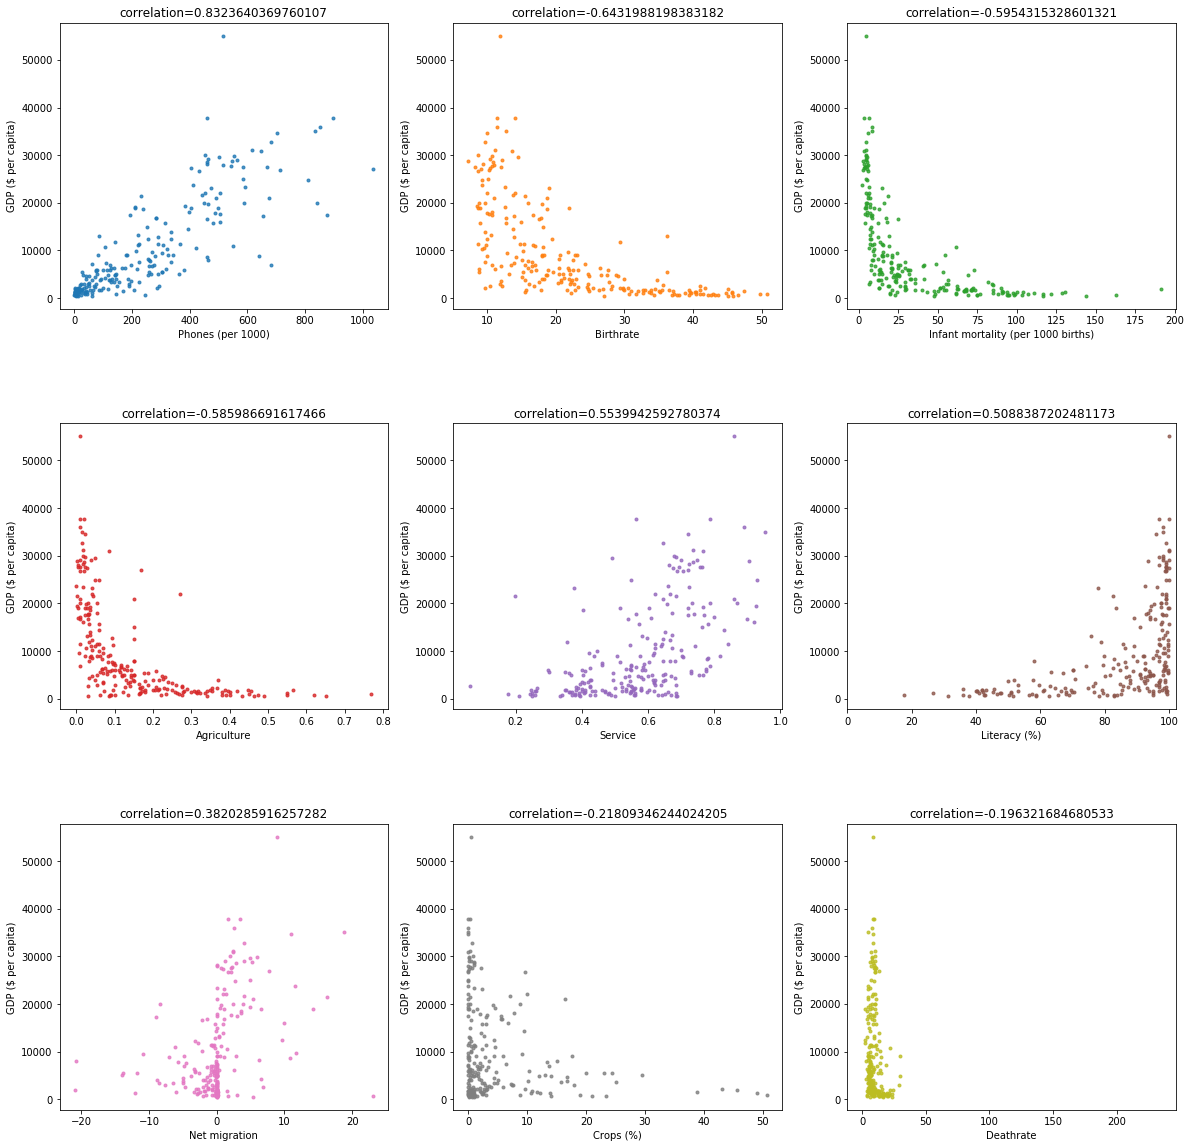

In [26]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,20))
plt.subplots_adjust(hspace=0.4)
corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(3):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()





Firstly, to understand the code- firstly 3 rows and 3 columns of graphs are preapared. first for loop is just for plotting the basic square shaped box only. the second for loop is for correlate attributes with GDP,puttng value on the axis, title and differetn attributes in rows and columns. 
Left curve shows negative relation between GDP and attributes such as birthrate, agriculture, crops and infant mortality. On the opposite, right curve shows direct relation with attributes such as climate, service, phones and literacy.

In [27]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

GDP ($ per capita)  Phones (per 1000)  \
Region                                                                       
ASIA (EX. NEAR EAST)                             3450.0              61.50   
BALTICS                                         11400.0             321.40   
C.W. OF IND. STATES                              3450.0             155.35   
EASTERN EUROPE                                   9100.0             296.05   
LATIN AMER. & CARIB                              6300.0             222.85   
NEAR EAST                                        9250.0             211.00   
NORTHERN AFRICA                                  6000.0             123.60   
NORTHERN AMERICA                                29800.0             683.20   
OCEANIA                                          5000.0             118.60   
SUB-SAHARAN AFRICA                               1300.0               9.70   
WESTERN EUROPE                                  27200.0             564.50   

                                     Service  
Region                                        
ASIA (EX. NEAR EAST)                  0.4950  
BALTICS                               0.6660  
C.W. OF IND. STATES                   0.4595  
EASTERN EUROPE                        0.5910  
LATIN AMER. & CARIB                   0.6180  
NEAR EAST                             0.5840  
NORTHERN AFRICA                       0.4255  
NORTHERN AMERICA                      0.7870  
OCEANIA                               0.6440  
SUB-SAHARAN AFRICA                    0.4260  
WESTERN EUROPE                        0.7200

from all the data, we created group of GDP, phones (per 1000 people) and services and arranged their median with their region.  

In [28]:
x = df[['GDP ($ per capita)','Phones (per 1000)','Service']]

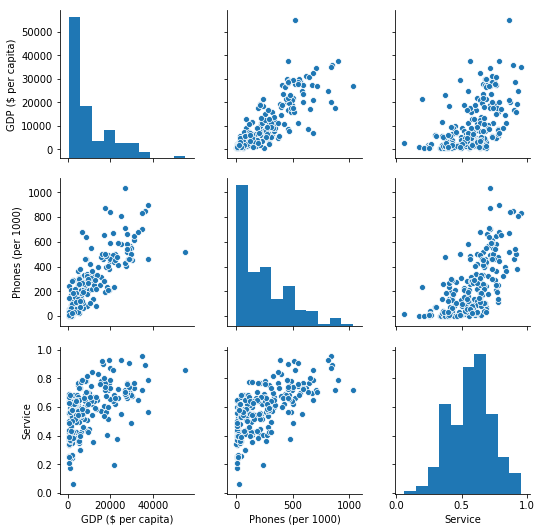

In [29]:
sns.pairplot(x)


Seaborn library created pair plots for GDP, phones and services. By analyzing we can see if there are good services, it will be contributing for good GDP but it is not responding directly. At initial, with the raising of services, there is no major change in GDP but after reaching at 0.6-0.8, GDP raised. On the other hand for phones, wiht the increase of GDP, no of phones per 1000 increased. For phones and services readings are very similar to GDP and services. It might possible that dur to good services, there are good GDP, means people are more stable there. and they can afford more electronic gadgets.    

In [30]:
x.corr()

GDP ($ per capita)  Phones (per 1000)   Service
GDP ($ per capita)            1.000000           0.832364  0.553994
Phones (per 1000)             0.832364           1.000000  0.670933
Service                       0.553994           0.670933  1.000000

this is the correlation and reading of above pairplots.

In [31]:
df['GDP ($ per capita)']

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

In [32]:
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]

In [33]:
gdp_no_nan

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
5       1900.0
6       8600.0
7      11000.0
8      11200.0
9       3500.0
10     28000.0
11     29000.0
12     30000.0
13      3400.0
14     16700.0
15     16900.0
16      1900.0
17     15700.0
18      6100.0
19     29100.0
20      4900.0
21      1100.0
22     36000.0
23      1300.0
24      2400.0
25      6100.0
26      9000.0
27      7600.0
28     16000.0
29     18600.0
        ...   
197     3300.0
198    23400.0
199     1000.0
200      600.0
201     7400.0
202     1500.0
203     2200.0
204     9500.0
205     6900.0
206     6700.0
207     5800.0
208     9600.0
209     1100.0
210     1400.0
211     5400.0
212    23200.0
213    27700.0
214    37800.0
215    12800.0
216     1700.0
217     2900.0
218     4800.0
219     2500.0
220    17200.0
221     3700.0
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

we have removed null value from list of GDPs.

C:\Users\kavit\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


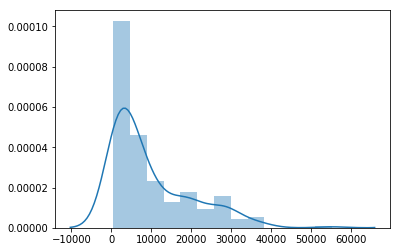

In [34]:
sns.distplot(np.array(gdp_no_nan))

this bar graph shows distribution of GDPs, where we can say that GDPs of most of the countries lies between 0 and 40000.

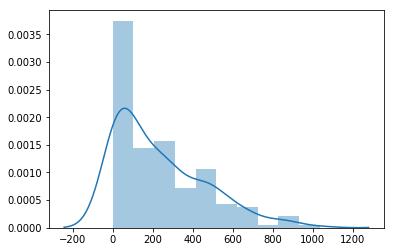

In [35]:
sns.distplot(np.array(df['Phones (per 1000)']))

this distribution graph shows maximum number of phones per 1000 people between 0 and 500. 

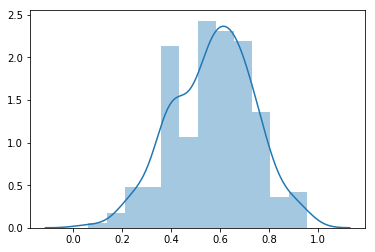

In [36]:
sns.distplot(np.array(df['Service']))

this distribution graph shows contribution from service sector in GDP which lies between 0.4 and 0.8.

## Conclusion
GDP per capita of any country depends on a number of attributes. For better understanding we read and analyze data of various country. There are a number of factors that contributes for GDP, but few affects majorly.
Factors that have majoe effect and directly proportional to the GDP-
1.Phones
2.Literacy
3.Services
4.Net migration
5.Climate

factors that are indirectly proportional to the GDP-
1.Agriculture
2.Infant mortality rate
3.Birth rate
4.Crops

After analyzing the data, we can say that these factors affects GDP as well as GDP affects these factors. For example, due to better public services,good conditions of agricultur that gives positive output, favourable climatic conditions, required birth rate and literacy, GDP of any country get rises. 
On the other hand if any country has high GDP, government can provide better services to the people, they can have balanced life with all the resources.It further helps them for best education and services.  




## Contributions
This is an assignment for data science engineering INFO 6105. We had to do EDA and all the codes have been pre defined except the one used for data cleaning which was taken from kaggle. 

## Citations
In this analysis, all tha codes have been taken from our professor's github account and the code for data cleaning is extracted from kaggle.


## License
Copyright <2019> <Kavita Patidar>

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.